# Task 2 · Data Science Lifecycle Planning

This notebook develops the project plan in line with Task 2 of the ITS8080 HEMS brief.

**Goals**
- Map the tailored data science lifecycle for the provided HEMS dataset.
- Highlight where the largest project effort is expected.
- Decide whether additional data sources are required beyond the supplied files.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from pathlib import Path

DATA_PATH = Path('..') / 'data' / 'raw' / 'train_252145.csv'
FIGURES_DIR = Path('..') / 'reports' / 'figures'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp']).set_index('timestamp')
df[['pv_mod1', 'pv_mod2', 'pv_mod3', 'pv', 'Demand', 'Price']].isna().mean().sort_values(ascending=False)

pv_mod3    0.058226
pv_mod2    0.056057
pv_mod1    0.050006
pv         0.000000
Demand     0.000000
Price      0.000000
dtype: float64

PosixPath('../reports/figures/task2_lifecycle.png')

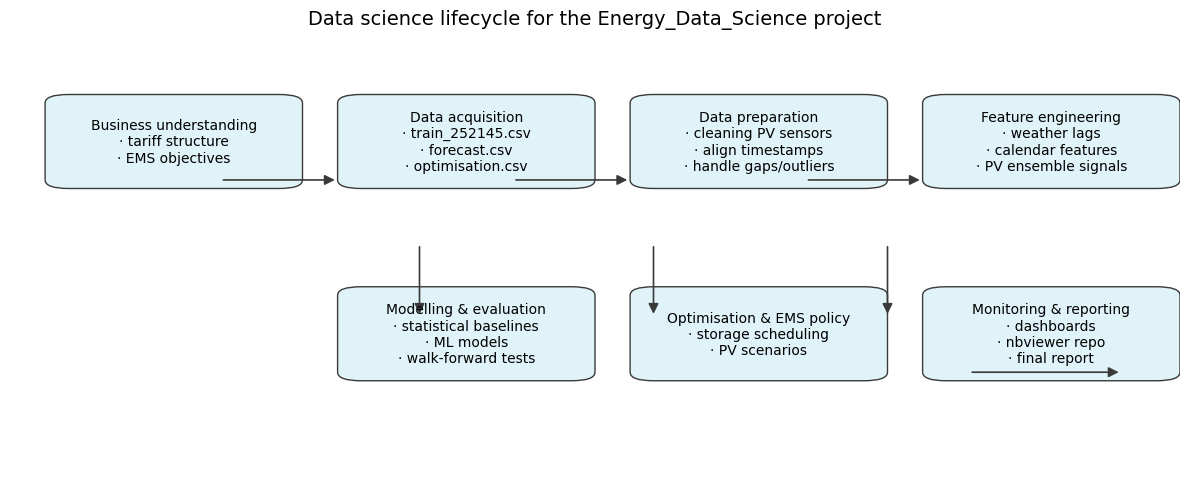

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
steps = [
  ('Business understanding\n· tariff structure\n· EMS objectives', (0.05, 0.7)),
  ('Data acquisition\n· train_252145.csv\n· forecast.csv\n· optimisation.csv', (0.3, 0.7)),
  ('Data preparation\n· cleaning PV sensors\n· align timestamps\n· handle gaps/outliers', (0.55, 0.7)),
  ('Feature engineering\n· weather lags\n· calendar features\n· PV ensemble signals', (0.8, 0.7)),
  ('Modelling & evaluation\n· statistical baselines\n· ML models\n· walk-forward tests', (0.3, 0.25)),
  ('Optimisation & EMS policy\n· storage scheduling\n· PV scenarios', (0.55, 0.25)),
  ('Monitoring & reporting\n· dashboards\n· nbviewer repo\n· final report', (0.8, 0.25)),
]
arrows = [
    ((0.18, 0.7), (0.28, 0.7)),
    ((0.43, 0.7), (0.53, 0.7)),
    ((0.68, 0.7), (0.78, 0.7)),
    ((0.35, 0.55), (0.35, 0.38)),
    ((0.55, 0.55), (0.55, 0.38)),
    ((0.75, 0.55), (0.75, 0.38)),
    ((0.82, 0.25), (0.95, 0.25)),
]
for text, (x, y) in steps:
    box = FancyBboxPatch((x, y), 0.18, 0.18, boxstyle='round,pad=0.02', ec='#3a3a3a', fc='#e0f3f8')
    ax.add_patch(box)
    ax.text(x + 0.09, y + 0.09, text, ha='center', va='center', fontsize=10)
for (x0, y0), (x1, y1) in arrows:
    arrow = FancyArrowPatch((x0, y0), (x1, y1), arrowstyle='-|>', mutation_scale=15, lw=1.2, color='#3a3a3a')
    ax.add_patch(arrow)
ax.set_title('Data science lifecycle for the Energy_Data_Science project', fontsize=14, pad=20)
fig.tight_layout()
figure_path = FIGURES_DIR / 'task2_lifecycle.png'
fig.savefig(figure_path, dpi=300)
figure_path

## Effort focus

- **High effort:** Data preparation and feature engineering. The three PV sensor channels (pv_mod1-3) show potential quality issues (missing values and divergent peaks) that will require cross-validation, outlier treatment, and reconstruction. Additionally, robust features derived from weather variables and calendar effects are essential for both forecasting and optimisation tasks.
- **Moderate effort:** Modelling and evaluation. Constructing ARMA baselines, ML models, and rolling validation will take time but reuses cleaned data.
- **Lower effort:** Business framing and reporting once analytics outputs are produced.

## External data requirements

The supplied datasets already contain timestamped demand, PV output, prices, and weather predictors, which are sufficient for Tasks 1–11. Optional enhancements include:
- **Local weather forecasts** (e.g., numerical weather prediction updates) to improve out-of-sample PV and demand forecasting accuracy.
- **Tariff metadata** detailing taxes or network charges if the optimisation stage must reflect complex billing layers.
At the current scope, no mandatory external data sources are required; completeness checks confirm that critical variables have minimal missingness.

## Next actions

- Execute Task 3 by formalising exploratory visualisations across the full dataset.
- Begin curating a data dictionary from the variables encountered during initial inspection.